<a href="https://colab.research.google.com/github/tonykks/2024_mirae_master/blob/main/%EC%A0%9C%EC%A3%BC%EC%A7%80%EC%A0%90_3_%EC%9B%94%ED%8F%89%EA%B7%A0%EA%B8%B0%EC%98%A8_%EC%B6%94%EC%9D%B4_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,617 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123623 files and dire

In [1]:
#라이브러리 설치 :  EXCEL 파일 읽기 위해 필요
!pip install openpyxl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the Excel file to inspect the contents for appropriate data selection and visualization
file_path = './df_jeju_final.xlsx'
df = pd.read_excel(file_path)

# Displaying the first few rows to understand the structure
df.head()

,일시,지점,폭염,최고체감온도,최고기온,평균기온,최저기온,평균상대습도,폭염특보,폭염영향예보(단계),열대야,자외선지수
0,2019-05-01,제주(184),0,20.0,18.6,14.7,12.4,74.6,0,,0,높음
1,2019-05-02,제주(184),0,21.7,21.5,17.2,12.8,40.9,0,,0,매우높음
2,2019-05-03,제주(184),0,22.3,21.9,18.9,16.0,49.0,0,,0,매우높음
3,2019-05-04,제주(184),0,22.1,23.3,19.2,14.7,48.0,0,,0,매우높음
4,2019-05-05,제주(184),0,22.2,22.2,19.0,16.4,51.9,0,,0,높음


In [6]:
# matplotlib 설정 변경
import matplotlib.font_manager as fm

# 한글 폰트를 matplotlib의 기본 폰트로 설정
plt.rcParams['font.family'] = 'NanumGothic'

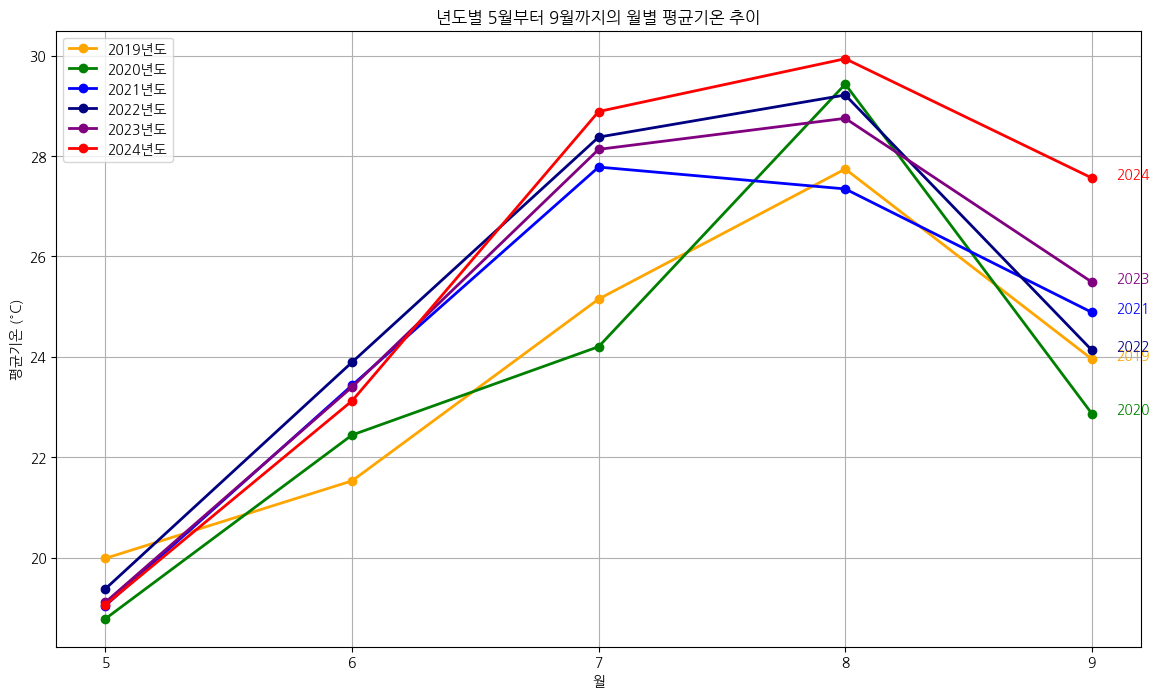

In [12]:
# Load the data from the first sheet
df_data = pd.read_excel(file_path, sheet_name='Sheet1')

# Extract the month from the '일시' column
df_data['월'] = pd.to_datetime(df_data['일시']).dt.month

# Calculate the monthly average of the average temperature
monthly_avg_temp = df_data.groupby('월')['평균기온'].mean()
# Extract the year and month from the '일시' column
df_data['년도'] = pd.to_datetime(df_data['일시']).dt.year

# Filter data for relevant years
years = [2019, 2020, 2021, 2022, 2023, 2024]
colors = {
    2019: 'orange',
    2020: 'green',
    2021: 'blue',
    2022: 'navy',
    2023: 'purple',
    2024: 'red'
}

# Filter the data to include only months from May to September
selected_months = [5, 6, 7, 8, 9]

# Plot with year labels positioned to the right of the September data points

plt.figure(figsize=(14, 8))

# Plot the average monthly temperature for each year from May to September
for year in years:
    yearly_data = df_data[(df_data['년도'] == year) & (df_data['월'].isin(selected_months))].groupby('월')['평균기온'].mean()
    if not yearly_data.empty:
        plt.plot(yearly_data.index, yearly_data.values, marker='o', linestyle='-', color=colors[year], linewidth=2, label=f'{year}년도')
        # Add the year label to the right of the September data point if it exists
        if 9 in yearly_data.index:
            plt.text(9.1, yearly_data.loc[9], f'{year}', fontsize=10, color=colors[year], ha='left')

plt.title('년도별 5월부터 9월까지의 월별 평균기온 추이')
plt.xlabel('월')
plt.ylabel('평균기온 (°C)')
plt.xticks(selected_months)
plt.grid(True)
plt.legend()
plt.show()

위 그래프는 2019년부터 2024년까지 제주 지역의 월별 평균기온을 연도별로 보여줍니다. 각 연도는 5월부터 9월까지의 평균기온 추이를 다르게 표시된 색상으로 나타내며, 특정 연도별 변화를 시각적으로 비교할 수 있습니다.

### 분석 및 해석
**연도별 기온 증가 추세**
그래프를 통해 전체적으로 월별 평균기온이 연도별로 상승하는 경향이 나타납니다. 특히, 2019년에서 2024년까지 각 연도의 평균기온 변화에서, 2024년이 가장 높은 기온을 기록하는 모습을 보여주며, 이는 최근 기후 변화의 영향을 반영하는 결과로 해석할 수 있습니다.

**여름철 기온 집중 현상**
5월에서 9월 사이, 특히 7월과 8월에 평균기온이 가장 높은 점을 확인할 수 있습니다. 이는 여름철 기온 상승이 여전히 주요 현상으로 자리잡고 있으며, 기후 변화 연구와 일치하는 결과입니다. 이러한 여름철의 기온 집중 현상은 높은 온도로 인한 여러 가지 사회적, 환경적 영향을 시사합니다.

**연도별 온도 패턴 변화**
연도별로 기온의 변화 패턴을 보면, 5월과 9월의 기온 역시 점차 높아지고 있어 여름이 더 길어지는 추세를 보입니다. 이는 기온 상승이 여름뿐만 아니라 봄과 초가을에도 영향을 미치고 있음을 나타내며, 기후 변화가 계절의 패턴을 변화시키고 있음을 시사합니다.

### 가설 검증
"기후 변화로 인해 여름철 평균기온이 점차 증가하고 있다"는 가설을 세웠을 때, 이 그래프는 이를 뒷받침하는 시각적 증거로 작용할 수 있습니다. 각 연도별로 평균기온의 증가 추세가 뚜렷하며, 기온 상승이 특정 달에 국한되지 않고 봄부터 가을까지 확장되는 모습을 보여줍니다.

### 추가 데이터 분석 제안
1. **연도별 기온 상승률 분석**: 각 연도의 평균기온 증가율을 계산하여 온난화의 영향을 보다 구체적으로 측정할 수 있습니다.
2. **계절별 기온 변화 패턴 분석**: 여름철뿐만 아니라 봄과 가을의 기온 변화를 분석해 계절의 범위가 어떻게 변화하는지 파악할 수 있습니다.
3. **기후 변화의 영향 비교**: 다른 지역의 기온 변화와 비교하여 제주 지역의 기후 변화가 특별히 두드러지는지를 분석할 수 있습니다.
4. **기상 데이터와의 상관 분석**: 열대야 일수와 평균기온 데이터를 비교 분석하여 평균기온 증가가 열대야 발생에 미치는 영향을 파악할 수 있습니다.

이러한 추가 분석은 평균기온 변화의 원인을 명확히 규명하고, 기후 변화의 영향을 보다 심층적으로 이해하는 데 도움이 될 것입니다.